In [30]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
'''for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))'''

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

"for dirname, _, filenames in os.walk('/kaggle/input'):\n    for filename in filenames:\n        print(os.path.join(dirname, filename))"

In [2]:
filepath = '/kaggle/input/agriculture-crop-images/crop_images/'

In [3]:
sub_class = os.listdir(filepath)
sub_class

['jute', 'maize', 'wheat', 'sugarcane', 'rice']

In [4]:
import matplotlib.pyplot as plt

In [5]:
fig = plt.figure(figsize=(10,5))
path = os.path.join(filepath,sub_class[0])
path

'/kaggle/input/agriculture-crop-images/crop_images/jute'

<Figure size 1000x500 with 0 Axes>

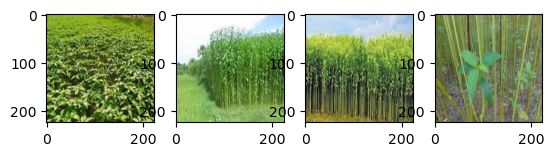

In [6]:
filenames = os.listdir(path)
filenames[:3]
j=1
for i in filenames[:4]:
    img=plt.imread(os.path.join(path,i))
    plt.subplot(240+j)
    j=j+1
    plt.imshow(img)

In [7]:
from tensorflow.keras.models import Sequential,Model
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: l

In [8]:
path_train1 = '/kaggle/input/agriculture-crop-images/crop_images/'
path_train2 = '/kaggle/input/agriculture-crop-images/kag2/'
path_train3 = '/kaggle/input/agriculture-crop-images/some_more_images/some_more_images/'

In [9]:
DataGen = ImageDataGenerator(zoom_range=0.2,horizontal_flip=True,
                             rotation_range=0.2,rescale=1/255)

In [10]:
train_gen1 = DataGen.flow_from_directory(directory=path_train1,
                                         target_size=(224,224), 
                                         batch_size=64)
train_gen2 = DataGen.flow_from_directory(directory=path_train2,
                                        target_size=(224,224),
                                        batch_size=64)
train_gen3 = DataGen.flow_from_directory(directory=path_train3,
                                        target_size=(224,224),
                                        batch_size=64,
                                        classes=['jute','maize','rice',
                                                 'sugarcane','wheat'])

Found 201 images belonging to 5 classes.
Found 804 images belonging to 5 classes.
Found 40 images belonging to 5 classes.


In [13]:
train_gen1.class_indices,train_gen2.class_indices,train_gen3.class_indices

({'jute': 0, 'maize': 1, 'rice': 2, 'sugarcane': 3, 'wheat': 4},
 {'jute': 0, 'maize': 1, 'rice': 2, 'sugarcane': 3, 'wheat': 4},
 {'jute': 0, 'maize': 1, 'rice': 2, 'sugarcane': 3, 'wheat': 4})

In [14]:
vgg16 = VGG16(include_top=False, input_shape=(224,224,3))

58889256/58889256 [==============================] - 0s 0us/step


In [15]:
for layer in vgg16.layers:
    layer.trainable = False

In [16]:
last_layer = Dense(5,activation='softmax')(Flatten()(vgg16.output))

In [17]:
model = Model(inputs =vgg16.input, outputs = last_layer)

In [18]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'])

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [20]:
model.fit(train_gen1,epochs=25)

Epoch 1/25
4/4 [==============================] - 23s 993ms/step - loss: 5.6094 - accuracy: 0.1542
Epoch 2/25
4/4 [==============================] - 3s 660ms/step - loss: 3.8136 - accuracy: 0.2935
Epoch 3/25
4/4 [==============================] - 3s 652ms/step - loss: 1.8075 - accuracy: 0.3682
Epoch 4/25
4/4 [==============================] - 3s 645ms/step - loss: 1.4702 - accuracy: 0.4279
Epoch 5/25
4/4 [==============================] - 3s 942ms/step - loss: 1.9323 - accuracy: 0.4677
Epoch 6/25
4/4 [==============================] - 4s 1s/step - loss: 0.8978 - accuracy: 0.6567
Epoch 7/25
4/4 [==============================] - 3s 664ms/step - loss: 1.0547 - accuracy: 0.6418
Epoch 8/25
4/4 [==============================] - 3s 637ms/step - loss: 0.7165 - accuracy: 0.7065
Epoch 9/25
4/4 [==============================] - 3s 614ms/step - loss: 0.9566 - accuracy: 0.6816
Epoch 10/25
4/4 [==============================] - 3s 950ms/step - loss: 1.2845 - accuracy: 0.5473
Epoch 11/25
4/4 [====

In [21]:
model.fit(train_gen2,epochs=25)

Epoch 1/25
13/13 [==============================] - 19s 1s/step - loss: 0.3557 - accuracy: 0.8756
Epoch 2/25
13/13 [==============================] - 12s 881ms/step - loss: 0.3848 - accuracy: 0.8607
Epoch 3/25
13/13 [==============================] - 11s 866ms/step - loss: 0.2076 - accuracy: 0.9403
Epoch 4/25
13/13 [==============================] - 12s 912ms/step - loss: 0.3926 - accuracy: 0.8545
Epoch 5/25
13/13 [==============================] - 11s 857ms/step - loss: 0.1128 - accuracy: 0.9751
Epoch 6/25
13/13 [==============================] - 12s 911ms/step - loss: 0.2979 - accuracy: 0.9279
Epoch 7/25
13/13 [==============================] - 11s 855ms/step - loss: 0.2419 - accuracy: 0.9229
Epoch 8/25
13/13 [==============================] - 12s 918ms/step - loss: 0.0575 - accuracy: 0.9988
Epoch 9/25
13/13 [==============================] - 11s 864ms/step - loss: 0.2961 - accuracy: 0.9042
Epoch 10/25
13/13 [==============================] - 11s 853ms/step - loss: 0.0422 - accuracy:

In [22]:
model.fit(train_gen3,epochs=25)

Epoch 1/25
1/1 [==============================] - 7s 7s/step - loss: 2.4981 - accuracy: 0.4500
Epoch 2/25
1/1 [==============================] - 1s 1s/step - loss: 3.7888 - accuracy: 0.5250
Epoch 3/25
1/1 [==============================] - 1s 1s/step - loss: 2.0898 - accuracy: 0.4500
Epoch 4/25
1/1 [==============================] - 1s 1s/step - loss: 1.5420 - accuracy: 0.6250
Epoch 5/25
1/1 [==============================] - 1s 1s/step - loss: 1.1688 - accuracy: 0.6250
Epoch 6/25
1/1 [==============================] - 1s 1s/step - loss: 1.4276 - accuracy: 0.6250
Epoch 7/25
1/1 [==============================] - 1s 1s/step - loss: 0.8551 - accuracy: 0.7250
Epoch 8/25
1/1 [==============================] - 1s 1s/step - loss: 0.7238 - accuracy: 0.7500
Epoch 9/25
1/1 [==============================] - 1s 1s/step - loss: 0.8849 - accuracy: 0.6750
Epoch 10/25
1/1 [==============================] - 1s 1s/step - loss: 0.6066 - accuracy: 0.8250
Epoch 11/25
1/1 [==============================] 

In [23]:
model.save('agricrop.h5')

In [24]:
import cv2

In [25]:
def get_prediction(path):
    x = cv2.imread(path)
    x = cv2.resize(x,(224,224))
    x = x.reshape(1,224,224,3)/255
    p = model.predict(x).argmax()
    return list(train_gen1.class_indices.keys())[p]

In [26]:
path_test = '/kaggle/input/agriculture-crop-images/test_crop_image/'
file_names = os.listdir(path_test)
count = 0

for file in file_names:
    names = get_prediction(path_test+file)
    print(file,names)
    if file[:3]==names[:3]:
        count+=1
print('Test_accuracy :',count/len(file_names))

1/1 [==============================] - 1s 832ms/step
maize000.jfif rice
1/1 [==============================] - 0s 24ms/step
rice-5174887_1280.jpg maize
1/1 [==============================] - 0s 29ms/step
juteplants.jpg jute
1/1 [==============================] - 0s 23ms/step
maize images.jfif maize
1/1 [==============================] - 0s 24ms/step
sugarcaneplant.jpg maize
1/1 [==============================] - 0s 24ms/step
maize corn set2.jpg maize
1/1 [==============================] - 0s 20ms/step
wheat-field-artificial-irrigation-rural-electrification-to-harvest-166395991.jpg sugarcane
1/1 [==============================] - 0s 22ms/step
juteimg.jpg jute
1/1 [==============================] - 0s 22ms/step
wheatcropfield04.jpg sugarcane
1/1 [==============================] - 0s 21ms/step
rice-4967164_1280.jpg rice
1/1 [==============================] - 0s 24ms/step
rice-fields-204128_1280.jpg sugarcane
1/1 [==============================] - 0s 45ms/step
jute002.jpg jute
1/1 [=======